Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Info of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


Statistical Info of data

In [5]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


Separating Features and Target

In [6]:
x = df.drop('Gender', axis=1)
y = df['Gender']

In [7]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [8]:
y.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

Splitting the data as 70:30 ratio

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
x_train.head()

,Height,Weight
553,67.594031,186.751417
1397,71.601697,211.031652
7934,62.625985,143.768451
8367,66.136131,151.814648
3320,71.843308,196.505814


In [12]:
y_train.head()

553       Male
1397      Male
7934    Female
8367    Female
3320      Male
Name: Gender, dtype: object

# KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

In [14]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
knn_classifier_pred = knn_classifier.predict(x_test)
knn_classifier_pred

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [16]:
np.array(y_test)

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype=object)

# Accuracy

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_roc_curve

In [18]:
accuracy_score(y_test, knn_classifier_pred)

0.9131281651733542

In [19]:
print(classification_report(y_test, knn_classifier_pred))

              precision    recall  f1-score   support

      Female       0.90      0.89      0.89      1066
        Male       0.92      0.93      0.93      1501

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [20]:
cnf = confusion_matrix(y_test, knn_classifier_pred)
cnf

array([[ 945,  121],
       [ 102, 1399]], dtype=int64)

In [21]:
import seaborn as sns

<AxesSubplot:>

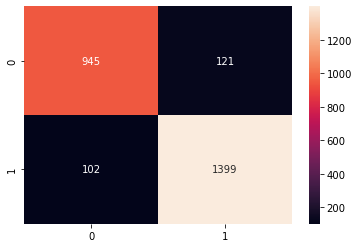

In [22]:
sns.heatmap(cnf, annot=True, fmt='d')

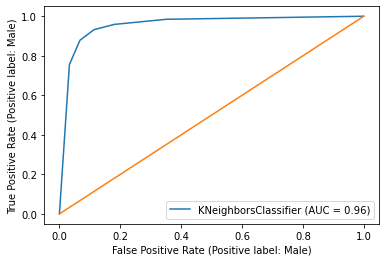

In [23]:
plot_roc_curve(knn_classifier, x_test, y_test)
plt.plot([0,1],[0,1])